https://learning.oreilly.com/library/view/python-programming-in/9781284175578/

#### Create the SolarSystem class

 __ssTurtle and __ssScreen that will provide graphical functionality to the solar system.  Since the turtle will not actually draw anything, we will hide it so that the shape cannot be seen. Using the width and height as parameters, we call the setworldcoordinates method to create a coordinate system that is equally distributed around the position (0, 0).

movePlanets method manipulates distance between the Sun and planets by using pythagorus theorem 

For planet interaction, the closer two objects are to each other (the smaller the r), the more they interact.

Our planet is not stationary in the solar system but is continually moving, at its velocity. Velocity is defined as the change in distance divided by the change in time. Velocity in two dimensions is computed in two components X and Y, and are referred to as Vx and Vy.  

Similarly, velocity of our planet will not be constant; instead, it will change over some period of time. This change is known as acceleration. Like velocity, acceleration in two dimensions is defined by a vector with two components, Ax and Ay. Acceleration can cause an object to change direction by altering one or both of the velocity components.

Let's see how to calculate **distance** from *velocity* and **velocity** from *acceleration*

Velocity is the distance traveled divided by the time, it follows that the distance traveled can be computed from the velocity and the time using the formula 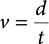

However, as noted earlier that the velocity is actually a vector with both an x-component and a y-component. As a consequence, the calculation for distance must be carried out twice, once for each component. The distance moved in the x direction, Dx, is the x-component of the velocity, Vx, multiplied by the time, and likewise for the movement in the y direction.

Since acceleration is the change in velocity over a given period of time,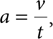
the same analysis can be done to compute the velocity components: Vx = Ax · t and Vy = Ay · t.

gravity, mass and distance between two objects have an impact on the interaction between them;  Their relative movement conforms to the formula 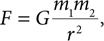

Applying *F = ma* to the above equation and simplyfying, we get 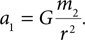

where G is the gravitational constant, m1 and m2 are the masses of the two objects, and r is the distance between the two objects.

In other words, the acceleration experienced by the first object due to the force of gravity from the second object can be calculated by multiplying the gravitational constant by the mass of the second object and dividing by the square of the distance between the two objects.

Let's compute the individual acceleration components Ax and Ay.  Use the following diagram for this purpose.

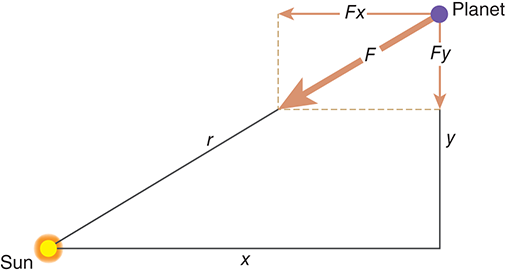

There are two similar triangles in the above diagram.  x, y, r and sides of the first triangle.  Fx, Fy, F are sides of second triangle.  Due to similarity of the triangles, ratios of the sides are equal.  Thus, 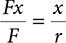

Multiplying above equation by *F*, we have 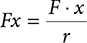

Using gravitation force formula, 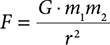

and the above equation

we get 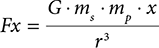

Using formula for force 

and above equation

we get 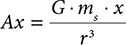

A similar derivation can be used to obtain the y-component.  Now, for the implementation

In [ ]:
class SolarSystem:
    def __init__(self, width, height):
        self.__theSun = None
        self.__planets = []
        self.__ssTurtle = turtle.Turtle()
        self.__ssTurtle.hideturtle()
        self.__ssScreen = turtle.Screen()
        self.__ssScreen.screensize(2000, 1500)
        self.__ssScreen.setworldcoordinates(-width/2.0, -height/2.0, width/2.0, height/2.0)
        
    def addPlanet(self, aPlanet):
        self.__planets.append(aPlanet)
    
    def addSun(self, aSun):
        self.__theSun = aSun
        
    def showPlanets(self):
        for aPlanet in self.__planets:
            print(aPlanet)
    
    def movePlanets(self):
        G = 0.1
        dt = 0.001 # time interval
        
        for p in self.__planets:
            # calculate where the planet moves to, based on its new velocity
            # causing a difference in the distance between planet and Sun
            p.moveTo(p.getXPos() + dt * p.getXVel(),
                     p.getYPos() + dt * p.getYVel())
            
            # compute this distance (radius) using pythagorus theorem.
            rX = self.__theSun.getXPos() - p.getXPos()
            rY = self.__theSun.getYPos() - p.getYPos()
            r = (rX ** 2 + rY ** 2) ** 0.5
            
            # which causes a difference in acceleration (X and Y components)
            accX = G * self.__theSun.getMass() * rX / r ** 3
            accY = G * self.__theSun.getMass() * rY / r ** 3
            
            # which changes the velocity (X and Y components)
            p.setXVel(p.getXVel() + dt * accX)
            p.setYVel(p.getYVel() + dt * accY)
            
    def freeze(self):
        self.__ssScreen.exitonclick()

Next, we create the **Sun** class.  *Sun* object will be used to initialize the solarsystem as (0.0), has a radius, mass and temperature.  The object will be circular shaped, and colored yellow.

In [ ]:
# Note that we've a separate turtle object for the SUn, so we can control the simulation for the sun separately.
class Sun:
    def __init__(self, iName, iRad, iM, iTemp):
        self.__name = iName
        self.__radius = iRad
        self.__mass = iM
        self.__temp = iTemp
        self.__x = 0
        self.__y = 0
        
        self.__sTurtle = turtle.Turtle()
        self.__sTurtle.shape("circle")
        self.__sTurtle.color("yellow")
        
    def getMass(self):
        return self.__mass
    
    def getXPos(self):
        return self.__x
    
    def getYPos(self):
        return self.__y

Now, we create a Planet class.  Each *planet* object will have its name, radius, mass and distance from Sun.  

Each planet is circular shaped, and has a different color.

In [ ]:
# Note that we've a separate turtle object for the Planet, so we can control the simulation for each planet separately.
class Planet:
    def __init__(self, iName, iRad, iM, iDist, iC, iVx=0, iVy=2):
        self.__name = iName
        self.__radius = iRad
        self.__mass = iM
        self.__distance = iDist
        self.__x = self.__distance # from the Sun
        self.__y = 0
        self.__color = iC
        self.__velX = iVx  # x component of planet's velocity
        self.__velY = iVy  # x component of planet's velocity
        
        turtle.setup()
        turtle.screensize(2000, 1500)

        self.__pTurtle = turtle.Turtle()
        self.__pTurtle.shape("circle")
        self.__pTurtle.color(self.__color)
        self.__pTurtle.shapesize(iRad/30)
        
        self.__pTurtle.up()
        self.__pTurtle.goto(self.__x, self.__y)
        self.__pTurtle.down()  # ready to move around the orbit
        
    def getMass(self):
        return self.__mass
    
    def getXPos(self):
        return self.__x
    
    def getYPos(self):
        return self.__y
    
    # defining the planetary movements
    def moveTo(self, newX, newY):
        self.__x = newX
        self.__y = newY
        self.__pTurtle.goto(self.__x, self.__y)
        
    def getXVel(self):
        return self.__velX
    
    def getYVel(self):
        return self.__velY
    
    def setXVel(self, newVx):
        self.__velX = newVx
        
    def setYVel(self, newVx):
        self.__velY = newVx        

In [ ]:
# Starting up the simulation environment of a SolarSystem
import turtle
ss = SolarSystem(2,2)

In [ ]:
sun = Sun("Sun", 5000, 10, 5800)
ss.addSun(sun)

m = Planet("Mercury", 19.5, 1000, .25, "blue")
ss.addPlanet(m)
           
m = Planet("Earth", 47.5, 5000, .3, "green")
ss.addPlanet(m)
           
m = Planet("Mars", 50, 9000, .5, "red")
ss.addPlanet(m)

m = Planet("Jupiter", 100, 49000, 0.7, "black")
ss.addPlanet(m)

numTimePeriods = 2000
for aMove in range(numTimePeriods):
    ss.movePlanets()
    
ss.freeze()

In [ ]:
import turtle

win_width, win_height, bg_color = 2000, 2000, 'black'

turtle.setup()
turtle.screensize(win_width, win_height, bg_color)

t = turtle.Turtle()
#t.hideturtle()
#t.speed(0)
t.color('white')

for _ in range(4):
    t.forward(500)
    t.right(90)

turtle.exitonclick()